<a href="https://colab.research.google.com/github/eugenewong-ai/refresher/blob/main/nhanes_univariate_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [ ]:
da['DMDMARTL'] = da['DMDMARTL'].replace({1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living with partner',
                       77: 'Refused', 99:'Don\'t Know'}).fillna('Missing')
                        

In [ ]:
da['RIAGENDR'] = da['RIAGENDR'].replace({1:'Male',2:'Female'}).fillna('Missing')

In [ ]:
da_male = da.loc[(da['RIAGENDR']=='Male') & (da['RIDAGEYR'])<=40 & (da['RIDAGEYR']>=30)]['DMDMARTL']

In [ ]:
da_female = da.loc[(da['RIAGENDR']=='Female') & (da['RIDAGEYR'])<=40 & (da['RIDAGEYR']>=30)]['DMDMARTL']

In [ ]:
# insert your code here
da_all = da.loc[(da['RIDAGEYR']<=40) & (da['RIDAGEYR']>=30)]['DMDMARTL']

In [ ]:
da_male.value_counts()

Married                2082
Never married           778
Divorced                469
Living with partner     397
Widowed                 364
Missing                 189
Separated               149
Refused                   1
Name: DMDMARTL, dtype: int64

In [ ]:
da_female.value_counts()

Married                2146
Never married           767
Divorced                428
Living with partner     398
Widowed                 291
Missing                 205
Separated               140
Refused                   2
Name: DMDMARTL, dtype: int64

In [ ]:
da_all.value_counts()

Married                560
Never married          217
Living with partner    143
Divorced                70
Separated               30
Widowed                  5
Refused                  1
Name: DMDMARTL, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

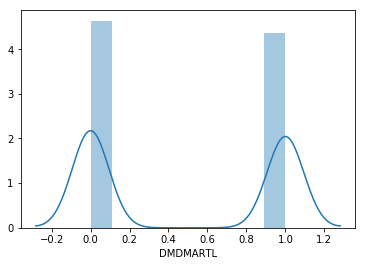

In [ ]:
sns.distplot((da['DMDMARTL']=='Married').astype(int))

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

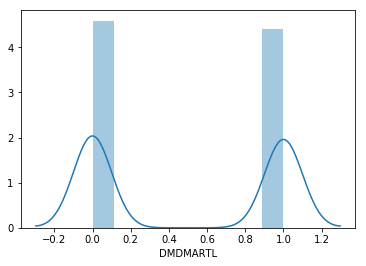

In [ ]:
sns.distplot((da_female=='Married').astype(int))

__Q1c.__ Repeat part b for the men.

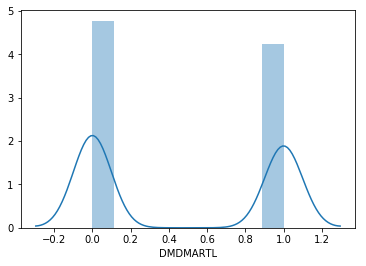

In [ ]:
sns.distplot((da_male=='Married').astype(int))

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [ ]:
np.max(da['RIDAGEYR'])

80

In [ ]:
np.min(da['RIDAGEYR'])

18

In [ ]:
# insert your code here
da['agegrp'] = pd.cut(da['RIDAGEYR'], [10,20,30,40,50,60,70,80])

In [ ]:
da.groupby(['agegrp'])['DMDMARTL'].value_counts()

agegrp    DMDMARTL           
(10, 20]  Missing                261
          Never married           66
          Living with partner     11
          Married                  2
(20, 30]  Never married          455
          Married                260
          Living with partner    198
          Separated               18
          Divorced                13
          Widowed                  2
(30, 40]  Married                516
          Never married          186
          Living with partner    129
          Divorced                67
          Separated               29
          Widowed                  4
          Refused                  1
(40, 50]  Married                570
          Divorced               103
          Never married          102
          Living with partner     70
          Separated               44
          Widowed                 14
(50, 60]  Married                553
          Divorced               140
          Never married           89
        

In [ ]:
dx = da.groupby(['agegrp'])['DMDMARTL'].value_counts()

In [ ]:
dx = dx.unstack()

In [ ]:
dx

DMDMARTL,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegrp,,,,,,,,
"(10, 20]",NaN,11.0,2.0,261.0,66.0,NaN,NaN,NaN
"(20, 30]",13.0,198.0,260.0,NaN,455.0,NaN,18.0,2.0
"(30, 40]",67.0,129.0,516.0,NaN,186.0,1.0,29.0,4.0
"(40, 50]",103.0,70.0,570.0,NaN,102.0,NaN,44.0,14.0
"(50, 60]",140.0,66.0,553.0,NaN,89.0,1.0,37.0,38.0
"(60, 70]",140.0,41.0,503.0,NaN,76.0,NaN,36.0,82.0
"(70, 80]",116.0,12.0,376.0,NaN,30.0,NaN,22.0,256.0


In [ ]:
dx = dx.fillna(0)

In [ ]:
dx.apply(lambda x: x/np.sum(dx,axis=1))

DMDMARTL,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
agegrp,,,,,,,,
"(10, 20]",0.000000,0.032353,0.005882,0.767647,0.194118,0.000000,0.000000,0.000000
"(20, 30]",0.013742,0.209302,0.274841,0.000000,0.480973,0.000000,0.019027,0.002114
"(30, 40]",0.071888,0.138412,0.553648,0.000000,0.199571,0.001073,0.031116,0.004292
"(40, 50]",0.114064,0.077519,0.631229,0.000000,0.112957,0.000000,0.048726,0.015504
"(50, 60]",0.151515,0.071429,0.598485,0.000000,0.096320,0.001082,0.040043,0.041126
"(60, 70]",0.159453,0.046697,0.572893,0.000000,0.086560,0.000000,0.041002,0.093394
"(70, 80]",0.142857,0.014778,0.463054,0.000000,0.036946,0.000000,0.027094,0.315271


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [ ]:
da['BMXHT'].dropna(inplace=True)

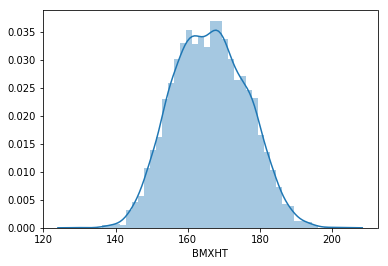

In [ ]:
sns.distplot(da['BMXHT'])

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

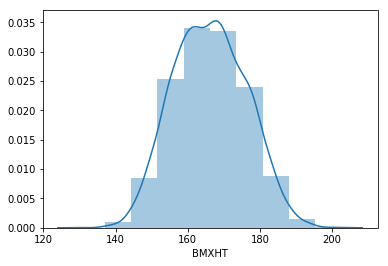

In [ ]:
sns.distplot(da['BMXHT'],bins=10)

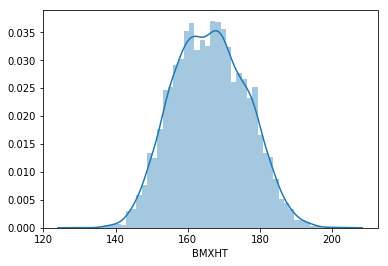

In [ ]:
sns.distplot(da['BMXHT'],bins=50)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

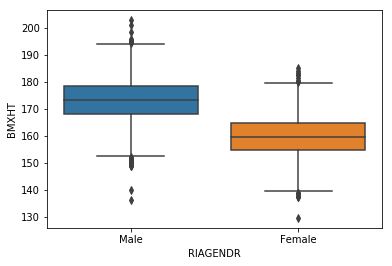

In [ ]:
sns.boxplot(x = da['RIAGENDR'], y=da['BMXHT'])

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

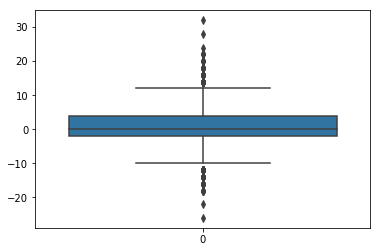

In [ ]:
da['diffBP'] =  da['BPXSY1'] -  da['BPXSY2']
sns.boxplot(data = da['diffBP'])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [ ]:
np.sum((da['diffBP'] < 0).astype(int))/len(da)

0.3412380122057541

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

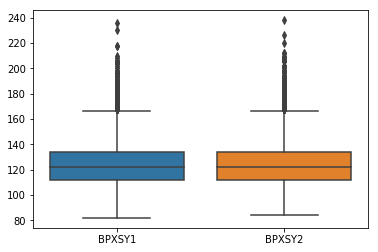

In [ ]:
sns.boxplot(data = da[['BPXSY1','BPXSY2']])

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
da['DMDHHSIZ'].head(4)

0    2
1    1
2    2
3    1
Name: DMDHHSIZ, dtype: int64

In [ ]:
dx = da.groupby(da['DMDEDUC2'])['DMDHHSIZ'].value_counts()

In [ ]:
dx.head(5)

DMDEDUC2  DMDHHSIZ
1.0       2           147
          5            97
          3            96
          4            87
          7            85
Name: DMDHHSIZ, dtype: int64

In [ ]:
dx = dx.unstack()

In [ ]:
dx = dx.fillna(0)

In [ ]:
dx.apply(lambda x: x/np.sum(dx,axis=1))

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
2.0,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
3.0,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
4.0,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
5.0,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
9.0,0.000000,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000


__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [ ]:
dx = da[(da['RIDAGEYR']<=40) & (da['RIDAGEYR'] >=30)]

In [ ]:
dx.groupby(dx['DMDEDUC2'])['DMDHHSIZ'].median()

DMDEDUC2
1.0    5
2.0    5
3.0    4
4.0    4
5.0    3
Name: DMDHHSIZ, dtype: int64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.